### Concepts in Statistical NLP - Tokenizing, Punctuation handling, Stemming, Lemmitization, Information Extraction using Chunking

In [6]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### Punctuation handling while tokenization, removing stopwords etc

In [7]:
text = ["applicant should be proficient in Go",
        "need experience in node.js","expert in C & C#"]

In [8]:
vect = CountVectorizer(stop_words="english")

In [9]:
dtm = pd.DataFrame(vect.fit_transform(text).toarray())
dtm.columns = vect.get_feature_names()

In [10]:
dtm

,applicant,experience,expert,js,need,node,proficient
0,1,0,0,0,0,0,1
1,0,1,0,1,1,1,0
2,0,0,1,0,0,0,0


In [11]:
from sklearn.feature_extraction import stop_words
 
print(stop_words.ENGLISH_STOP_WORDS)

frozenset({'beside', 'hereby', 'anywhere', 'nine', 'seems', 'toward', 'within', 'last', 'what', 'after', 'hundred', 'then', 'something', 'four', 'none', 'its', 'eg', 'always', 'could', 'else', 'whenever', 'other', 'whoever', 'thereafter', 'amongst', 'are', 'whose', 'former', 'cant', 'third', 'formerly', 'into', 'herself', 'found', 'find', 'had', 'nobody', 'everyone', 'put', 'yourself', 'eight', 'has', 'than', 'onto', 'may', 'someone', 'many', 'one', 'mostly', 'against', 'often', 'becoming', 'her', 'keep', 'neither', 'anyhow', 'them', 'their', 'side', 'do', 'show', 'elsewhere', 'thin', 'your', 'who', 'interest', 'yet', 'above', 'couldnt', 'hers', 'itself', 'throughout', 'twelve', 'behind', 'been', 'through', 'three', 'sincere', 'thence', 'hereafter', 'how', 'describe', 'meanwhile', 'our', 'among', 'only', 'the', 'wherever', 'am', 'each', 'on', 'nothing', 'never', 'afterwards', 'so', 'is', 'another', 'noone', 'while', 'as', 'either', 'he', 'whither', 'they', 'twenty', 'should', 'beyond',

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
import re
re.sub("C#","CSharp","proficiency in c#",flags=re.IGNORECASE)

'proficiency in CSharp'

#### Creating the DTM again after replacing C# with CSharp and Go with GoLang

In [13]:
text = [re.sub("C#","CSharp",x,flags=re.IGNORECASE) for x in text]

In [14]:
text = [re.sub("go","golang",x,flags=re.IGNORECASE) for x in text]

In [15]:
text

['applicant should be proficient in golang',
 'need experience in node.js',
 'expert in C & CSharp']

#### Reducing inflectional forms via Stemming & Lemmatization

In [16]:
text = ["loved the movie","love the acting and the cast","i am loving it"]

In [17]:
dtm = pd.DataFrame(vect.fit_transform(text).toarray())
dtm.columns = vect.get_feature_names()

In [18]:
dtm

,acting,cast,love,loved,loving,movie
0,0,0,0,1,0,1
1,1,1,1,0,0,0
2,0,0,0,0,1,0


In [19]:
import nltk
#nltk.download()

In [20]:
from nltk import word_tokenize          
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer

#### Stemming

In [24]:
stem = PorterStemmer()
stem.stem("loving")

'love'

In [25]:
text_stem = []
for review in text:
    text_stem.append(" ".join([stem.stem(x) for x in word_tokenize(review)]))

In [23]:
text_stem

['love the movi', 'love the act and the cast', 'i am love it']

#### Stemming a text

In [27]:
text = "Ricky Ponting is a former Australian cricketer"

In [28]:
text_stem = []
text_stem.append(" ".join([stem.stem(x) for x in word_tokenize(text)]))

In [29]:
text_stem

['ricki pont is a former australian cricket']

#### Lemmatization

In [31]:
text = "Ricky Ponting is a former Australian cricketer"

In [32]:
from nltk import pos_tag
from nltk.corpus import wordnet
pos_tag(word_tokenize(text))

[('Ricky', 'JJ'),
 ('Ponting', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('former', 'JJ'),
 ('Australian', 'JJ'),
 ('cricketer', 'NN')]

In [33]:
lemma = WordNetLemmatizer()

In [34]:
# lemmatization output changes based on pos
lemma.lemmatize("banking",wordnet.NOUN)

'banking'

In [35]:
# lemmatization output changes based on pos
lemma.lemmatize("banking",wordnet.VERB)

'bank'

In [36]:
# lemmatization output changes based on pos
lemma.lemmatize("banking",wordnet.ADJ)

'banking'

In [37]:
pos_tag(word_tokenize('I am banking on you for this'))

[('I', 'PRP'),
 ('am', 'VBP'),
 ('banking', 'VBG'),
 ('on', 'IN'),
 ('you', 'PRP'),
 ('for', 'IN'),
 ('this', 'DT')]

In [38]:
pos_tag(word_tokenize('I am working in the banking sector and my friend is a professor.'))

[('I', 'PRP'),
 ('am', 'VBP'),
 ('working', 'VBG'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('banking', 'NN'),
 ('sector', 'NN'),
 ('and', 'CC'),
 ('my', 'PRP$'),
 ('friend', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('professor', 'NN'),
 ('.', '.')]

In [39]:

def get_wordnet_pos_tag(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    if tag.startswith("V"):
        return wordnet.VERB
    if tag.startswith("N"):
        return wordnet.NOUN
    if tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#### Using lemmatization normalize the preceding sentence

In [40]:
text = "Ricky Ponting is a former Australian cricketer"

In [41]:
text_pos = pos_tag(word_tokenize(text))
text_words = [x[0] for x in text_pos]
text_pos = [x[1] for x in text_pos]

In [42]:
[lemma.lemmatize(a, get_wordnet_pos_tag(b)) for a,b in zip(text_words, text_pos)]

['Ricky', 'Ponting', 'be', 'a', 'former', 'Australian', 'cricketer']

In [43]:
text = "I work in banking"

In [44]:
text_pos = pos_tag(word_tokenize(text))
text_words = [x[0] for x in text_pos]
text_pos = [x[1] for x in text_pos]

In [45]:
[lemma.lemmatize(a, get_wordnet_pos_tag(b)) for a,b in zip(text_words, text_pos)]

['I', 'work', 'in', 'banking']

In [46]:
text = "I am banking on you for this."

In [47]:
text_pos = pos_tag(word_tokenize(text))
text_words = [x[0] for x in text_pos]
text_pos = [x[1] for x in text_pos]

In [48]:
[lemma.lemmatize(a, get_wordnet_pos_tag(b)) for a,b in zip(text_words, text_pos)]

['I', 'be', 'bank', 'on', 'you', 'for', 'this', '.']

#### Information extraction using chunking

In [107]:
#!pip install Ghostscript

In [167]:
#import ghostscript
import os

In [169]:
os.environ['PATH'] = os.environ['PATH'] + ";C:\\Program Files\\gs\\gs9.51\\bin\\"

In [170]:
import nltk
from nltk import pos_tag, word_tokenize

In [171]:
sentence = "He brought a very expensive laptop and fancy car and a beautiful house"
grammar = "NP: {<JJ><NN>}"
chunker = nltk.RegexpParser(grammar) 
result = chunker.parse(pos_tag(word_tokenize(sentence))) 

In [172]:
print(result)

(S
  He/PRP
  brought/VBD
  a/DT
  very/RB
  (NP expensive/JJ laptop/NN)
  and/CC
  (NP fancy/JJ car/NN)
  and/CC
  a/DT
  (NP beautiful/JJ house/NN))


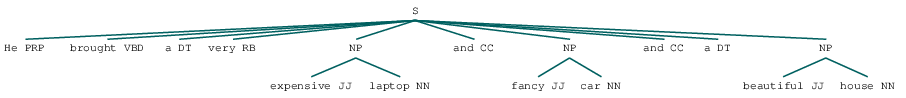

In [173]:
result

In [138]:
noun_phrases = []
for n in result:
    #print(n)
    if isinstance(n, nltk.tree.Tree): 
        #print(n)
        if n.label() == 'NP':
            print(n)
            temp_phrase = list(n)
            print(temp_phrase)
            temp_phrase = ' '.join([x[0] for x in temp_phrase])
            print(temp_phrase)
            noun_phrases.append(temp_phrase)
            print(noun_phrases)


(NP expensive/JJ laptop/NN)
[('expensive', 'JJ'), ('laptop', 'NN')]
expensive laptop
['expensive laptop']
(NP fancy/JJ car/NN)
[('fancy', 'JJ'), ('car', 'NN')]
fancy car
['expensive laptop', 'fancy car']
(NP beautiful/JJ house/NN)
[('beautiful', 'JJ'), ('house', 'NN')]
beautiful house
['expensive laptop', 'fancy car', 'beautiful house']


In [139]:
noun_phrases

['expensive laptop', 'fancy car', 'beautiful house']

In [140]:
# define a function to return chunks for noun phrases

def return_np_chunks(sentence):
    grammar = "NP: {<JJ><NN>}"
    chunker = nltk.RegexpParser(grammar) 
    result = chunker.parse(pos_tag(word_tokenize(sentence))) 
    
    noun_phrases = []
    for n in result:
        if isinstance(n, nltk.tree.Tree):               
            if n.label() == 'NP':
                temp_phrase = list(n)
                temp_phrase = ' '.join([x[0] for x in temp_phrase])
                noun_phrases.append(temp_phrase)
    return noun_phrases

In [141]:
return_np_chunks("he has a big house and a fancy car")

['big house', 'fancy car']

In [142]:
return_np_chunks(yelp["text"].iloc[0])

['absolute pleasure', 'pretty sure', 'white truffle', 'vegetable skillet']

In [153]:
return_np_chunks(yelp["text"].iloc[1])

['own fault', 'sweetish sauce']